# Naive Bayesアルゴリズムを用いたサンプルデータの分類

## 1. ライブラリのインポート

まずは必要なライブラリをインポートします。  
Scikit learnからGaussianNB(Gaussian型Naive Bayes)を呼んでいます。

In [1]:
# 必要なライブラリのインポート
from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 2. トレーニングデータの用意

2次元のトレーニングデータを自前で用意します。  
xがデータ、yがそのlabel(1 or 2)になります。

In [2]:
# トレーニングデータセットの用意
x = np.array([[-2,6], [0,6], [0,7], [-2,5], [-3,3], [-1,0], [-2,0], [-3,1], [-1,4], [0,3], [0,1], [-1,7], [-3,5], [-4,3], [-2,0], [-3,7], [1,5], [1,2], [-2,3], [2,3], [-4,0], [-1,3], [1,1], [-2,2], [2,7], [-4,1]])
y = np.array([2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2])

## 3. トレーニングデータの可視化

用意したトレーニングデータを2次元平面に描画して、可視化してみましょう。

[2 1 2 1 1 2 2 2 1 1 2 2 2 2 2 1 1 1 2 2 1 1 2 1 2 2]
[[ 0  6  1]
 [-2  5  1]
 [-3  3  1]
 [-1  4  1]
 [ 0  3  1]
 [-3  7  1]
 [ 1  5  1]
 [ 1  2  1]
 [-4  0  1]
 [-1  3  1]
 [-2  2  1]]
[[-2  6  2]
 [ 0  7  2]
 [-1  0  2]
 [-2  0  2]
 [-3  1  2]
 [ 0  1  2]
 [-1  7  2]
 [-3  5  2]
 [-4  3  2]
 [-2  0  2]
 [-2  3  2]
 [ 2  3  2]
 [ 1  1  2]
 [ 2  7  2]
 [-4  1  2]]


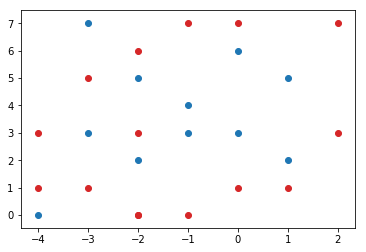

In [5]:
# グラフ描画に向けてのデータの整形
data = np.hstack((x, y.reshape(y.shape[0],1)))
#rint(data)
#data は　x1,x2,yの順番
print(data[:,2])

#yのデータごとにデータごとに分類
data1 = data[np.where(data[:,2]==1)]
data2 = data[np.where(data[:,2]==2)]
print(data1)
print(data2)

# matplotlibを用いたデータの可視化（グラフ化）
plt.close("all")
plt.scatter(data1[:,0], data1[:,1], c="tab:blue")
plt.scatter(data2[:,0], data2[:,1], c="tab:red")
plt.show()

多少の外れ値はありますが、全体として中心の青（label1）のデータ点の集まりを赤（label2）のデータが囲んでいるような構造が見えます。

## 4. モデルの学習

それではこのトレーニングデータを用いて、Gaussian Naive Bayesを学習させます。  
学習はほぼ一瞬で終わります。

In [6]:
# モデルの学習
model = GaussianNB()
model.fit(x, y)
print("Model fitted.")

Model fitted.


## 5. テストデータの用意と可視化

次にテストデータを用意し、それをグラフに描画してみましょう。

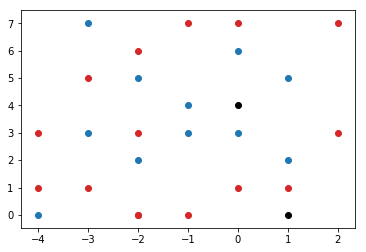

In [7]:
# テストデータの用意
test_data = np.array([[0,4], [1,0]])

# matplotlibを用いたデータの可視化（グラフ化）
plt.close("all")
plt.scatter(data1[:,0], data1[:,1], c="tab:blue")
plt.scatter(data2[:,0], data2[:,1], c="tab:red")
plt.scatter(test_data[:,0], test_data[:,1], c="k" )
plt.show()

黒の点がテストデータ[0,4]と[1,0]になります。  
[0,4]は青（label1）のデータ点の集まりの中に位置し、[1,0]は外側の赤（label2）のデータのあたりに位置しています。

## 5. テストデータの分類（モデルの検証）

それではテストデータを学習したモデルに与えて分類させてみます。

In [8]:
# テストデータの分類
test_label = model.predict(test_data)
print("Label of test data", test_data[0], ":", test_label[0])
print("Label of test data", test_data[1], ":", test_label[1])













































































































Label of test data [0 4] : 1
Label of test data [1 0] : 2


用意したテストデータ[0,4]はlabel1に、[1,0]はlabel2に分類されていることがわかります。  
この結果から、青（label1）のデータの外側に赤（label2）のデータというトレーニングデータの構造を、モデルがうまく掴んでいるであろうことがわかります。

他にもトレーニングデータを変えてみたり、テストデータを変えてみたりして色々な設定で動かしてみてましょう。アルゴリズムの特徴をつかむのに役に立つはずです。